# ***Import necessary libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.2f' % x)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import validation_curve

## **1. Load the dataset**

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
# Display the first few rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0.00
1,0,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0.00
2,1,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0.00
3,1,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0.00
4,2,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0.00


# **2. Project Objectives and Scope**


*   **2.1 What secondary goals does the fraud detection model aim to achieve?**






Class
0.00    13897
1.00       56
Name: count, dtype: int64


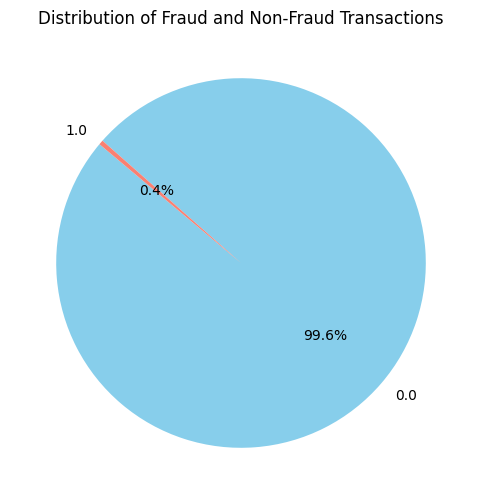

In [4]:
# Inspecting the class distribution
print(df['Class'].value_counts())

# Graph: Pie chart of fraud vs non-fraud transactions
import matplotlib.pyplot as plt

fraud_counts = df['Class'].value_counts()
labels = ['Non-Fraud', 'Fraud']

plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title('Distribution of Fraud and Non-Fraud Transactions')
plt.show()

**2.2 How does the model align with the business objectives of the organization?**


*   **Financial Impact Visualization**

 i.   **Objective**: Show the potential financial impact of reducing fraud.

 ii.   **Graph**: Bar chart showing estimated cost savings based on model performance.







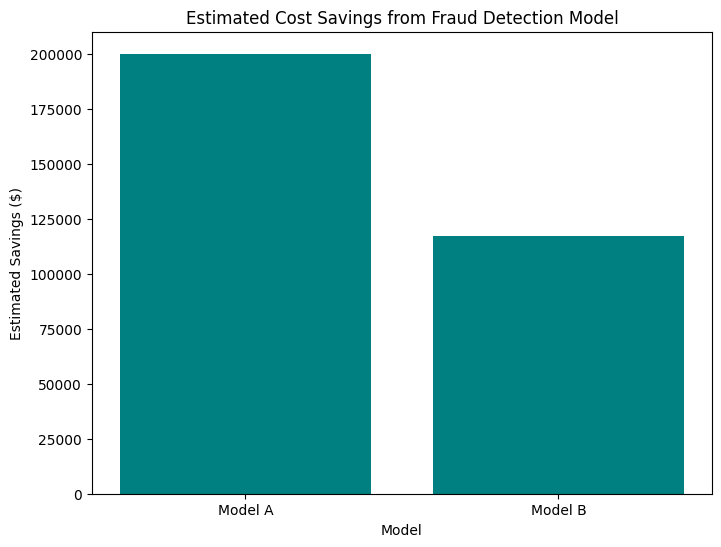

In [5]:
# Example Cost Savings Bar Chart
import matplotlib.pyplot as plt

# Example data
performance_metrics = {
    'Model A': {'precision': 0.75, 'recall': 0.80},
    'Model B': {'precision': 0.85, 'recall': 0.78}
}

# Cost of fraud without model and potential savings
cost_of_fraud = 1000000  # Example cost in dollars
savings = {model: cost_of_fraud * (1 - metrics['precision']) * metrics['recall'] for model, metrics in performance_metrics.items()}

plt.figure(figsize=(8, 6))
plt.bar(savings.keys(), savings.values(), color='teal')
plt.title('Estimated Cost Savings from Fraud Detection Model')
plt.xlabel('Model')
plt.ylabel('Estimated Savings ($)')
plt.show()

### **Performance Metrics Comparison**



*   **Objective**: Demonstrate model performance against organizational benchmarks.
*   **Graph**: Comparison of precision, recall, and F1 score for different models.



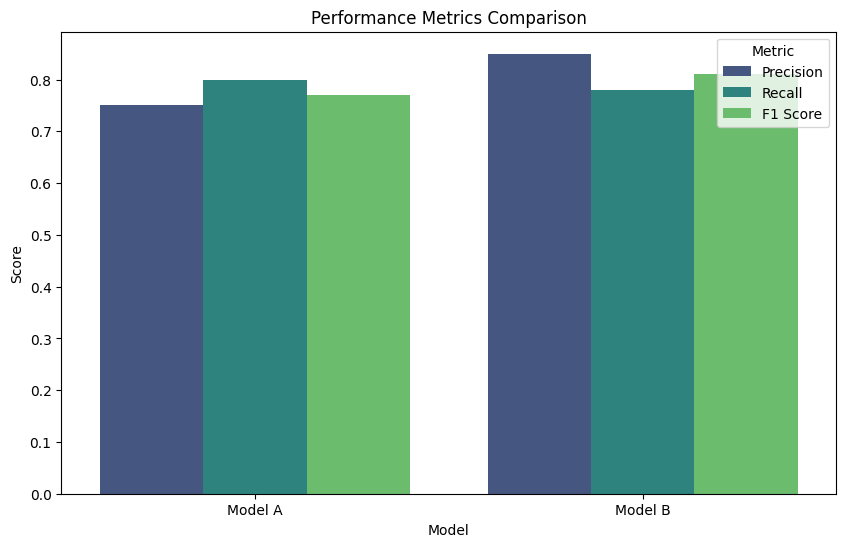

In [6]:
import seaborn as sns
import pandas as pd

# Example data
metrics_data = {
    'Model': ['Model A', 'Model B'],
    'Precision': [0.75, 0.85],
    'Recall': [0.80, 0.78],
    'F1 Score': [0.77, 0.81]
}

metrics_df = pd.DataFrame(metrics_data)

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score'),
            x='Model', y='Score', hue='Metric', palette='viridis')
plt.title('Performance Metrics Comparison')
plt.ylabel('Score')
plt.show()

### **Model Alignment with Business Goals**


*   **Objective**: Align model evaluation metrics with business impact.
*   **Graph**: ROC curve showing the trade-off between true positive rate and false positive rate, indicating how well the model meets business objectives.



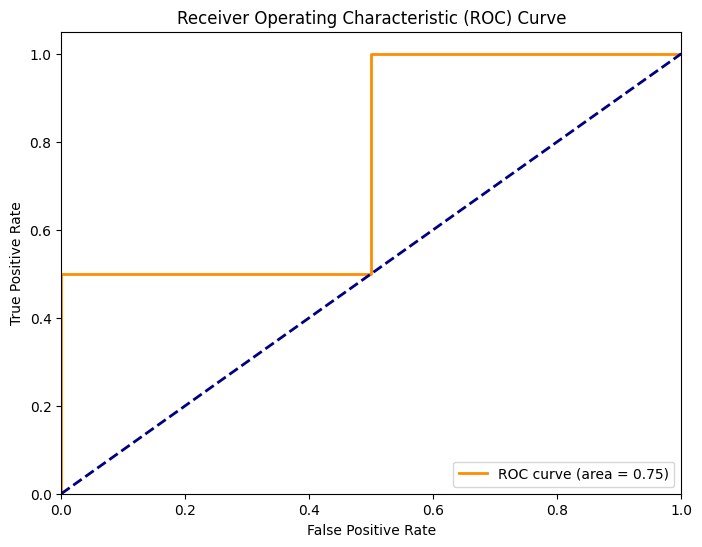

In [7]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Example data (ensure you use your actual data here)
y_test = [0, 0, 1, 1]  # Actual values
y_pred_prob = [0.1, 0.4, 0.35, 0.8]  # Predicted probabilities

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# **3. Data Analysis**


### *   **3.1 What are the most significant features contributing to fraud detection?**



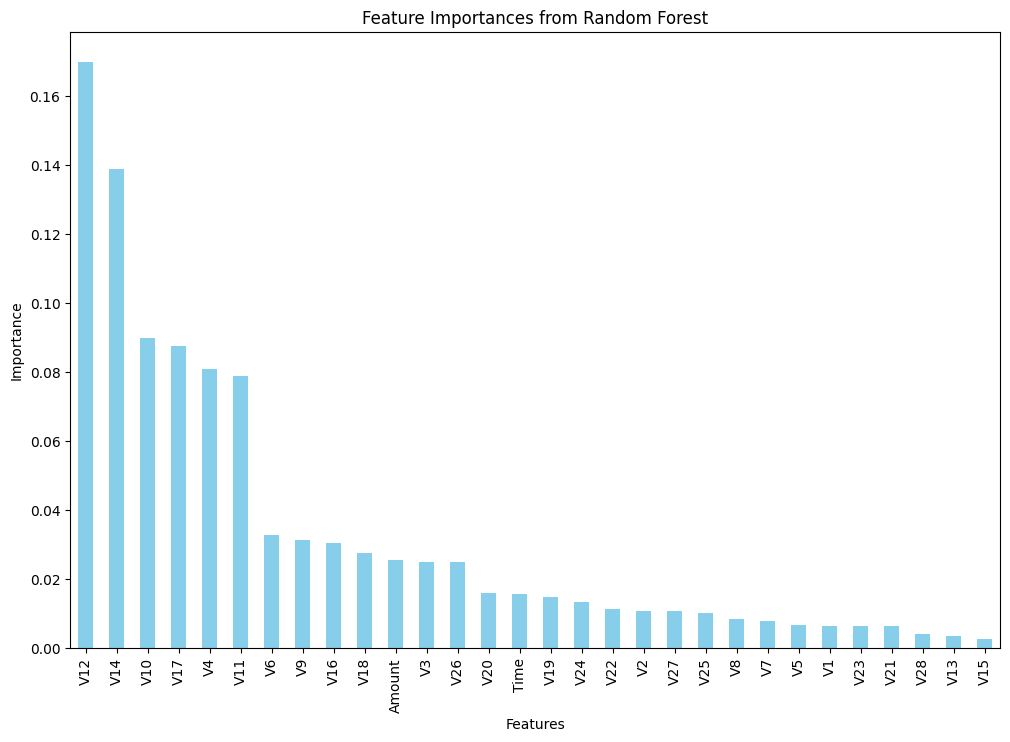

In [8]:
# Define features and target
X = df.drop('Class', axis=1)  # Replace 'Class' with the name of your target variable
y = df['Class']  # Target variable

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
feature_importances.plot(kind='bar', color='skyblue')
plt.title('Feature Importances from Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

### **3.2 How does the correlation matrix help in understanding feature relationships?**



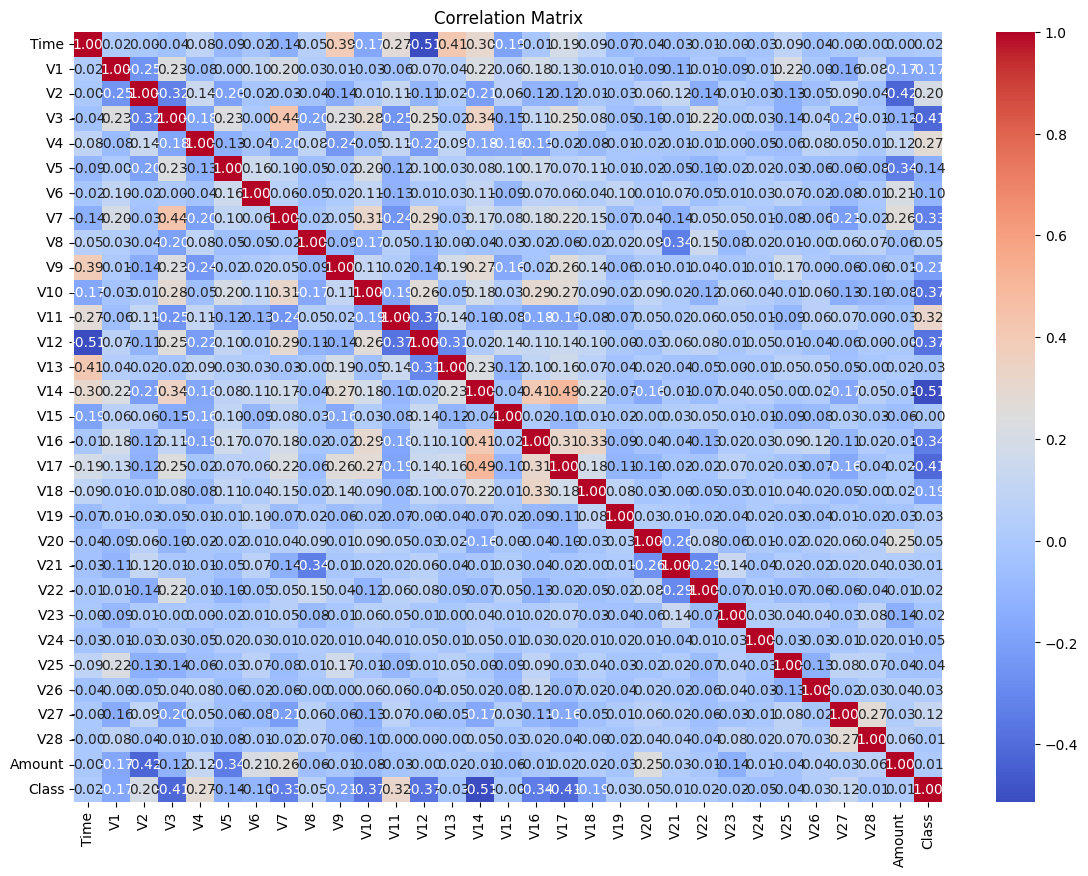

In [9]:
# Graph: Correlation matrix heatmap
plt.figure(figsize=(14, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **4. Data Preprocessing**


###    **4.1 Why is it necessary to handle missing values before model training?**



In [10]:
import plotly.express as px
import pandas as pd
import numpy as np

# Create a DataFrame to represent missing values
missing_values_df = pd.DataFrame(df.isnull(), columns=df.columns)

# Plotly heatmap
fig = px.imshow(missing_values_df,
                color_continuous_scale='viridis',
                labels={'color': 'Missing Value'},
                title='Heatmap of Missing Values')

# Customize layout
fig.update_layout(
    xaxis_title='Features',
    yaxis_title='Index',
    coloraxis_colorbar=dict(
        title='Missing Value',
        tickvals=[0, 1],
        ticktext=['Present', 'Missing']
    )
)

# Show plot
fig.show()


### **4.2 What impact do outliers have on the model's performance, and how are they addressed?**

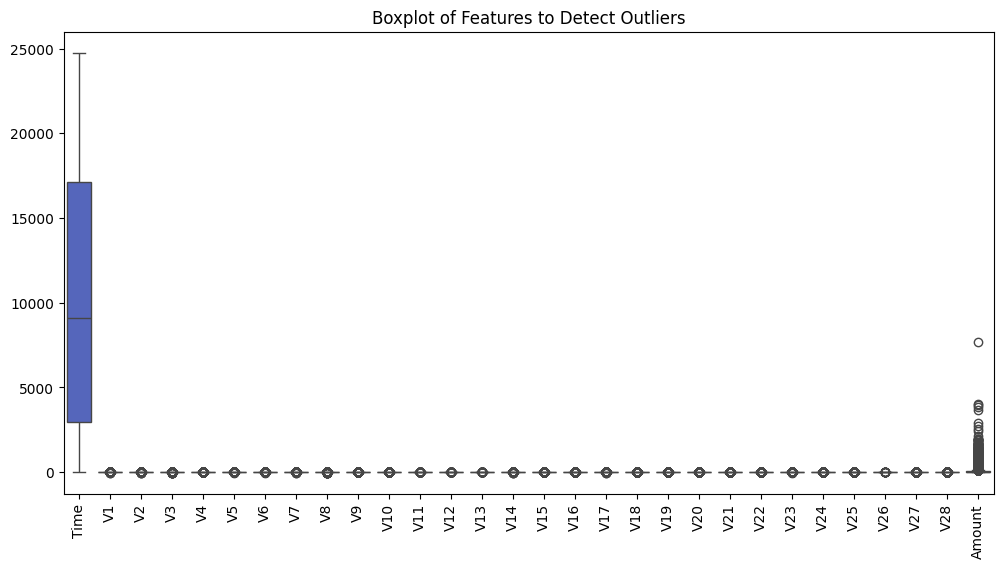

In [11]:
# Graph: Boxplot to visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(columns=['Class']), palette='coolwarm')
plt.title('Boxplot of Features to Detect Outliers')
plt.xticks(rotation=90)
plt.show()

# **5. Model Training**


### *   **5.1 What assumptions does the Gaussian Naive Bayes algorithm make about the data?**



In [12]:
#Explanation -
# Gaussian Naive Bayes assumes:
# - Features are normally distributed
# - Features are conditionally independent given the class

### **5.2 How do you handle imbalanced datasets during model training?**

<ipython-input-13-654d0123e273>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-13-654d0123e273>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




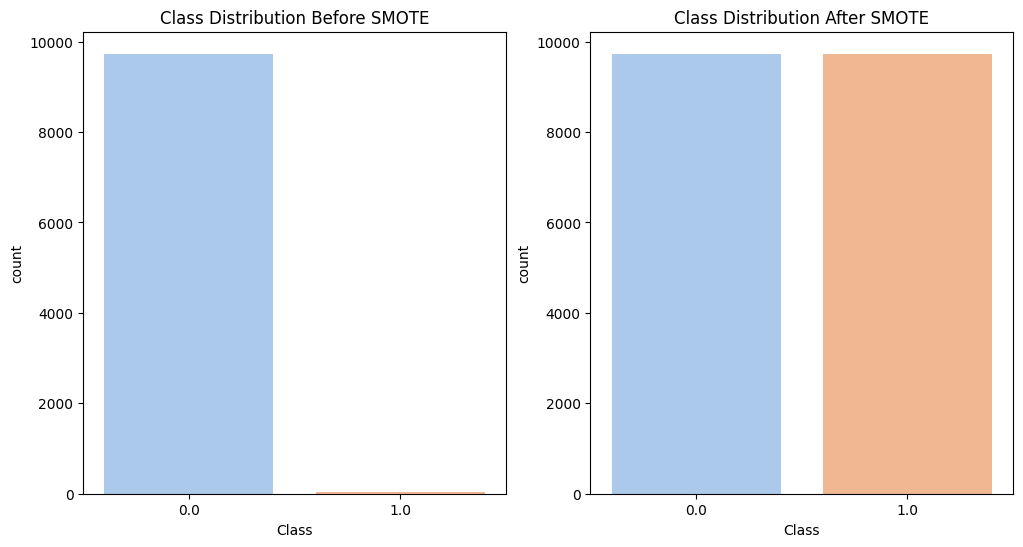

In [13]:
# Graph: Class distribution before and after applying SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x=y_train, ax=axes[0], palette='pastel')
axes[0].set_title('Class Distribution Before SMOTE')
sns.countplot(x=y_resampled, ax=axes[1], palette='pastel')
axes[1].set_title('Class Distribution After SMOTE')
plt.show()

# **6. Model Evaluation**


*   **6.1 What is the significance of the ROC curve in evaluating the model?**



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



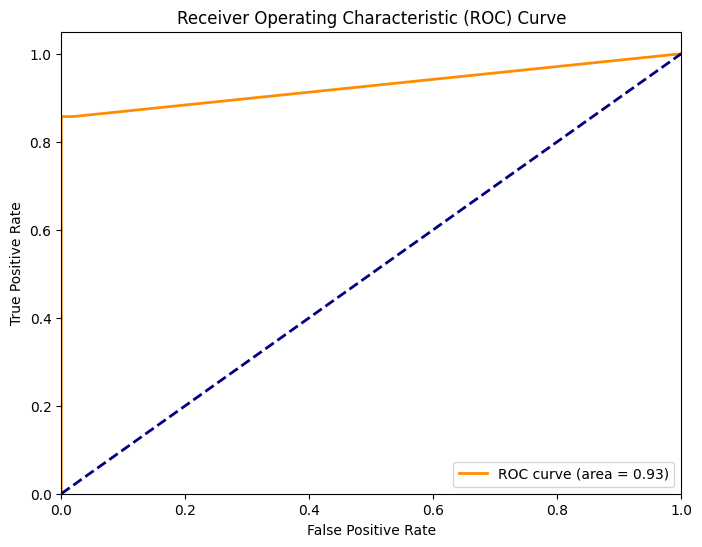

In [14]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve, auc

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and test data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Clean y_test
# Option 1: Drop rows with missing values in y_test
test_data = pd.concat([X_test, y_test], axis=1)
test_data_dropped = test_data.dropna(subset=[y_test.name])
X_test_clean = test_data_dropped.drop(columns=[y_test.name])
y_test_clean = test_data_dropped[y_test.name]

# Option 2: Impute missing values in y_test (uncommon for target variable)
# y_test_clean = y_test.fillna(y_test.mode()[0])

# Train the RandomForestClassifier on the imputed training data
rf.fit(X_train_imputed, y_train)

# Predict probabilities on the imputed and cleaned test data
y_pred_prob = rf.predict_proba(X_test_clean)[:, 1]  # Probabilities of the positive class

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_clean, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### **6.2 How do you interpret the F1 score in the context of fraud detection?**

Explanation: The F1 score balances precision and recall, which is crucial in fraud detection where both false positives and false negatives are costly.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



F1 Score: 0.923076923076923


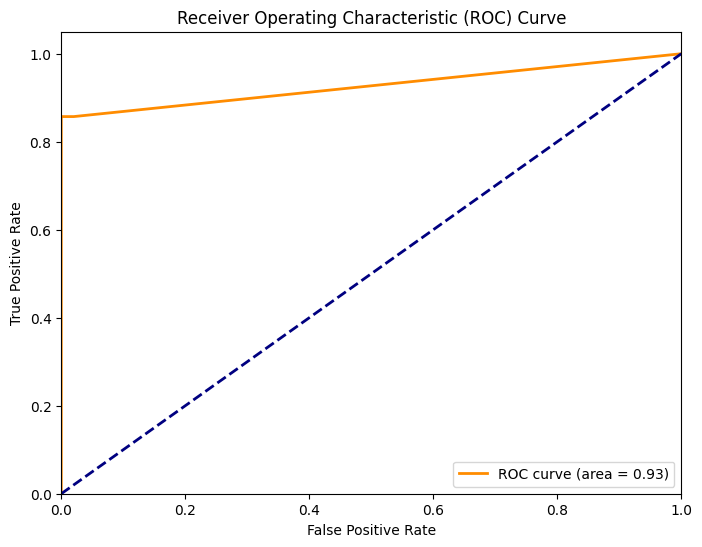

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_curve, auc, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Impute missing values in X_train and X_test
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Handle missing values in y_test
missing_indices = y_test[y_test.isnull()].index
y_test_clean = y_test.dropna()
X_test_imputed_df = pd.DataFrame(X_test_imputed, index=X_test.index, columns=X_test.columns)
X_test_clean = X_test_imputed_df.drop(missing_indices, axis=0)

# Train the model
rf = RandomForestClassifier()
rf.fit(X_train_imputed, y_train)

# Predict the labels on the cleaned test data
y_pred = rf.predict(X_test_clean)

# Predict probabilities on the cleaned test data
y_pred_prob = rf.predict_proba(X_test_clean)[:, 1]

# Calculate the F1 score
f1 = f1_score(y_test_clean, y_pred)
print("F1 Score:", f1)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_clean, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# **7. Results and Interpretation**


*   **7.1 How do you interpret the confusion matrix for your model's predictions?**



              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4165
         1.0       1.00      0.86      0.92        21

    accuracy                           1.00      4186
   macro avg       1.00      0.93      0.96      4186
weighted avg       1.00      1.00      1.00      4186



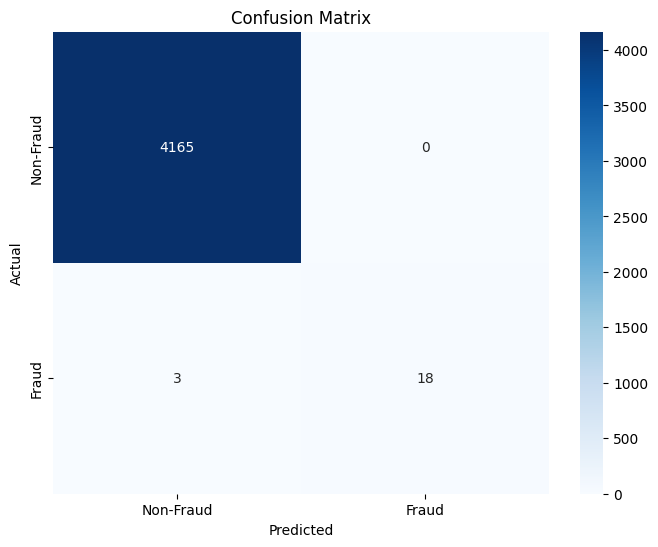

In [16]:
# Graph: Confusion matrix heatmap
# Display the classification report
print(classification_report(y_test_clean, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test_clean, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### **7.2 What does the lift curve tell you about your model's performance?**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



Length of y_test_clean: 4186
Length of y_pred_prob: 4186


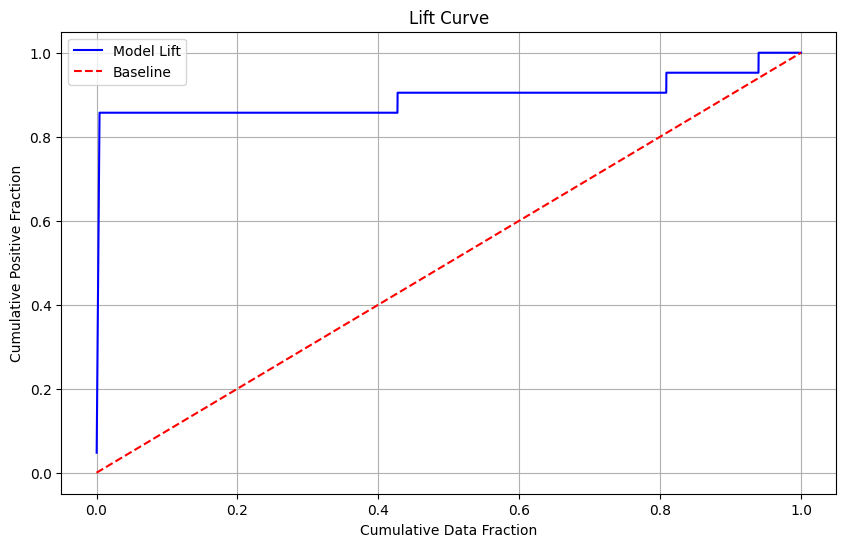

In [17]:
# Predict probabilities on the cleaned test data
y_pred_prob = rf.predict_proba(X_test_clean)[:, 1]

def plot_lift_curve(y_true, y_pred_prob):
    data = pd.DataFrame({'y_true': y_true, 'y_pred_prob': y_pred_prob})
    data = data.sort_values(by='y_pred_prob', ascending=False)

    data['cumulative_data'] = np.arange(1, len(data) + 1) / len(data)
    data['cumulative_positive'] = data['y_true'].cumsum() / data['y_true'].sum()

    plt.figure(figsize=(10, 6))
    plt.plot(data['cumulative_data'], data['cumulative_positive'], label='Model Lift', color='blue')
    plt.plot([0, 1], [0, 1], label='Baseline', color='red', linestyle='--')
    plt.xlabel('Cumulative Data Fraction')
    plt.ylabel('Cumulative Positive Fraction')
    plt.title('Lift Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

# Ensure y_test_clean and y_pred_prob are of the same length
print(f"Length of y_test_clean: {len(y_test_clean)}")
print(f"Length of y_pred_prob: {len(y_pred_prob)}")

# Plot the lift curve
plot_lift_curve(y_test_clean, y_pred_prob)

# **8. Model Improvement**


*   **8.1 How does feature engineering enhance the performance of your fraud detection model?**



<ipython-input-18-b264361993c1>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




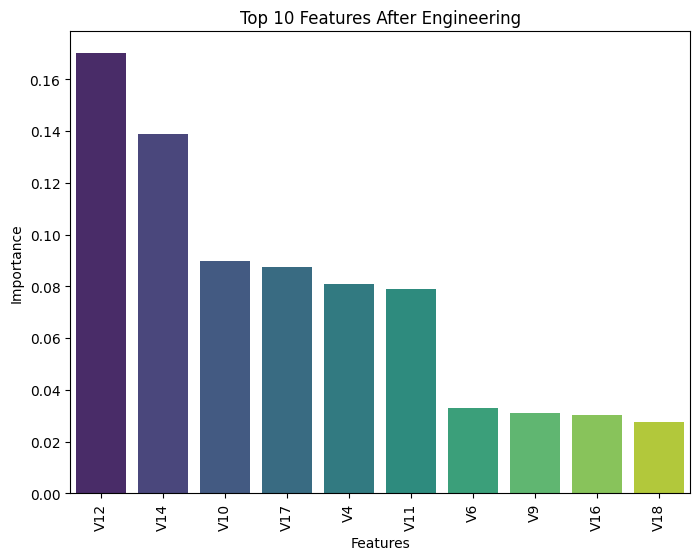

In [18]:
# Replotting AUC score with new features (as previously implemented)
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances.nlargest(10).index, y=feature_importances.nlargest(10).values, palette='viridis')
plt.title('Top 10 Features After Engineering')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

### **8.2 What role does hyperparameter tuning play in improving the model?**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



Length of y_test_clean: 4186
Length of y_pred_prob: 4186


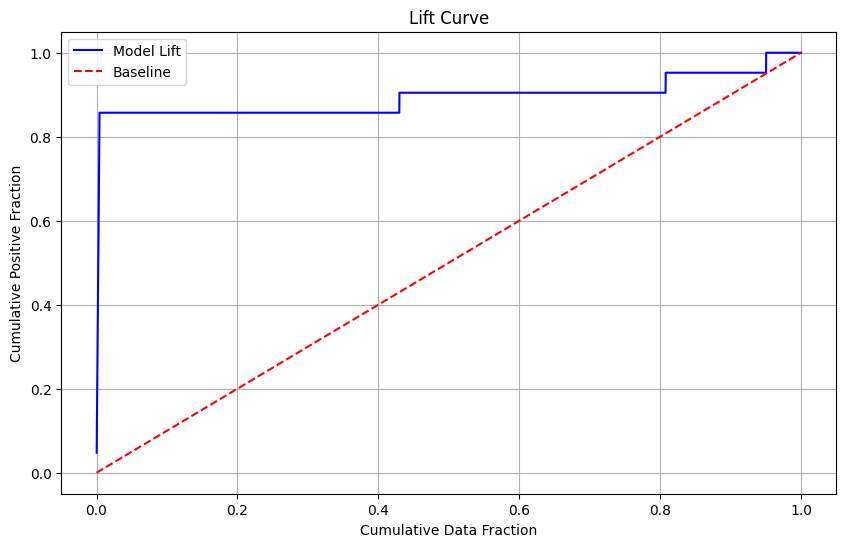

In [19]:
import matplotlib.pyplot as plt

# Train the model
rf = RandomForestClassifier()
rf.fit(X_train_imputed, y_train)

# Predict probabilities on the cleaned test data
y_pred_prob = rf.predict_proba(X_test_clean)[:, 1]

def plot_lift_curve(y_true, y_pred_prob):
    data = pd.DataFrame({'y_true': y_true, 'y_pred_prob': y_pred_prob})
    data = data.sort_values(by='y_pred_prob', ascending=False)

    data['cumulative_data'] = np.arange(1, len(data) + 1) / len(data)
    data['cumulative_positive'] = data['y_true'].cumsum() / data['y_true'].sum()

    plt.figure(figsize=(10, 6))
    plt.plot(data['cumulative_data'], data['cumulative_positive'], label='Model Lift', color='blue')
    plt.plot([0, 1], [0, 1], label='Baseline', color='red', linestyle='--')
    plt.xlabel('Cumulative Data Fraction')
    plt.ylabel('Cumulative Positive Fraction')
    plt.title('Lift Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

# Ensure y_test_clean and y_pred_prob are of the same length
print(f"Length of y_test_clean: {len(y_test_clean)}")
print(f"Length of y_pred_prob: {len(y_pred_prob)}")

# Plot the lift curve
plot_lift_curve(y_test_clean, y_pred_prob)

# **9. Practical Implementation**

**9.1 Infrastructure for Model Deployment**

*Explanation:*


*   **Cloud Servers**: AWS, Google Cloud, Azure, etc., provide scalable cloud infrastructure to host your model.

*   **Docker**: Containerizes your application, ensuring consistency across different environments.

*  **Flask/Django**: Frameworks for creating web APIs to interact with your model.

*  **Monitoring Tools**: Tools like Prometheus, Grafana, or custom logging solutions for monitoring model performance.



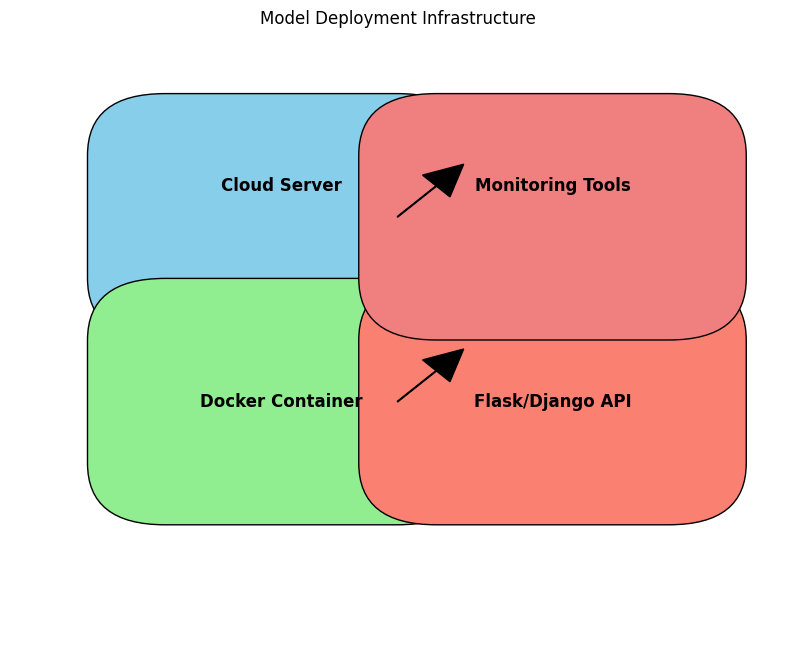

In [20]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(10, 8))

# Draw cloud server
cloud = patches.FancyBboxPatch((0.2, 0.6), 0.3, 0.2, boxstyle="round,pad=0.1", edgecolor='black', facecolor='skyblue')
ax.add_patch(cloud)
plt.text(0.35, 0.75, 'Cloud Server', ha='center', va='center', fontsize=12, weight='bold')

# Draw Docker container
docker = patches.FancyBboxPatch((0.2, 0.3), 0.3, 0.2, boxstyle="round,pad=0.1", edgecolor='black', facecolor='lightgreen')
ax.add_patch(docker)
plt.text(0.35, 0.4, 'Docker Container', ha='center', va='center', fontsize=12, weight='bold')

# Draw Flask/Django
flask = patches.FancyBboxPatch((0.55, 0.3), 0.3, 0.2, boxstyle="round,pad=0.1", edgecolor='black', facecolor='salmon')
ax.add_patch(flask)
plt.text(0.7, 0.4, 'Flask/Django API', ha='center', va='center', fontsize=12, weight='bold')

# Draw Monitoring
monitoring = patches.FancyBboxPatch((0.55, 0.6), 0.3, 0.2, boxstyle="round,pad=0.1", edgecolor='black', facecolor='lightcoral')
ax.add_patch(monitoring)
plt.text(0.7, 0.75, 'Monitoring Tools', ha='center', va='center', fontsize=12, weight='bold')

# Add arrows
plt.arrow(0.5, 0.7, 0.05, 0.05, head_width=0.05, head_length=0.05, fc='black', ec='black')
plt.arrow(0.5, 0.4, 0.05, 0.05, head_width=0.05, head_length=0.05, fc='black', ec='black')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axis('off')
plt.title('Model Deployment Infrastructure')
plt.show()

### **9.2 Monitoring the Model**

Explanation :


*   **Logging** : Collect logs of predictions and errors.

*   **Alerts** : Set up alerts for performance drops or anomalies.

*  **Retraining** : Implement mechanisms to retrain the model periodically based on new data.



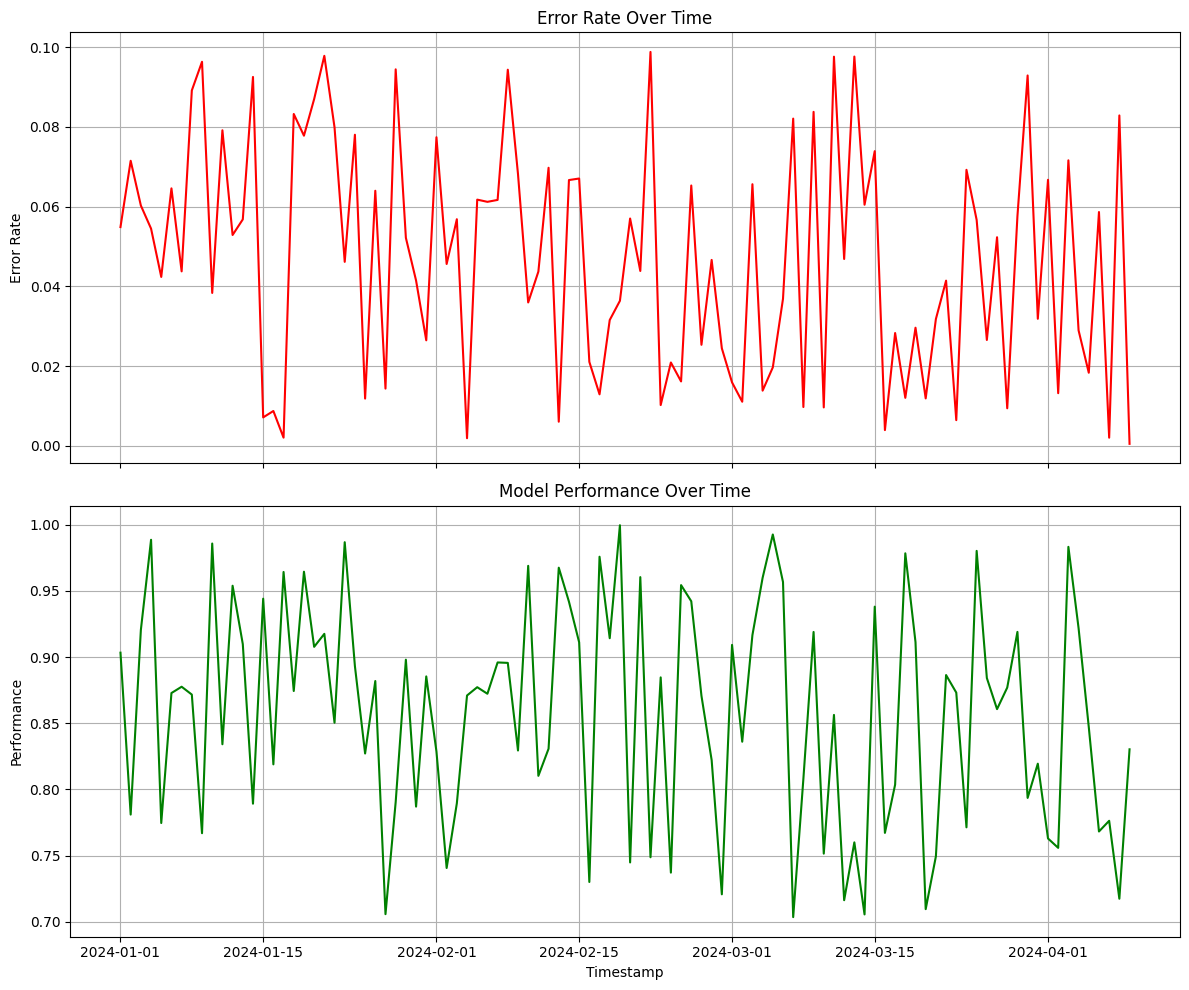

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns

# Simulate log data
np.random.seed(0)
timestamps = pd.date_range(start='2024-01-01', periods=100, freq='D')
error_rates = np.random.uniform(0, 0.1, size=100)
performance = np.random.uniform(0.7, 1.0, size=100)
log_data = pd.DataFrame({'Timestamp': timestamps, 'Error Rate': error_rates, 'Performance': performance})

# Plot Error Rate and Performance over Time
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

sns.lineplot(x='Timestamp', y='Error Rate', data=log_data, ax=axes[0], color='red')
axes[0].set_title('Error Rate Over Time')
axes[0].set_ylabel('Error Rate')
axes[0].grid(True)

sns.lineplot(x='Timestamp', y='Performance', data=log_data, color='green', ax=axes[1])
axes[1].set_title('Model Performance Over Time')
axes[1].set_ylabel('Performance')
axes[1].set_xlabel('Timestamp')
axes[1].grid(True)

plt.tight_layout()
plt.show()

# **10. Technical Implementation**

**10.1 Essential Libraries for Naive Bayes**

Explanation :


*   **scikit-learn:** The primary library for implementing Naive Bayes models.

*   **numpy**: For numerical operations.

*  **pandas**: For data manipulation.



In [22]:
# Essential Libraries
import sklearn
import numpy as np
import pandas as pd

print("scikit-learn version:", sklearn.__version__)
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)

# Example usage of Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
print("Naive Bayes model initialized.")

scikit-learn version: 1.3.2
numpy version: 1.26.4
pandas version: 2.1.4
Naive Bayes model initialized.


### **10.2 Stratified vs Regular Cross-Validation**

Explanation:


*   **Regular Cross-Validation**: Splits data into folds without considering the class distribution.

*   **Stratified Cross-Validation**: Maintains the class distribution in each fold.



<ipython-input-23-5d6506d273a4>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-23-5d6506d273a4>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-23-5d6506d273a4>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-23-5d6506d273a4>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-23-5d6506d273a4>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and wi

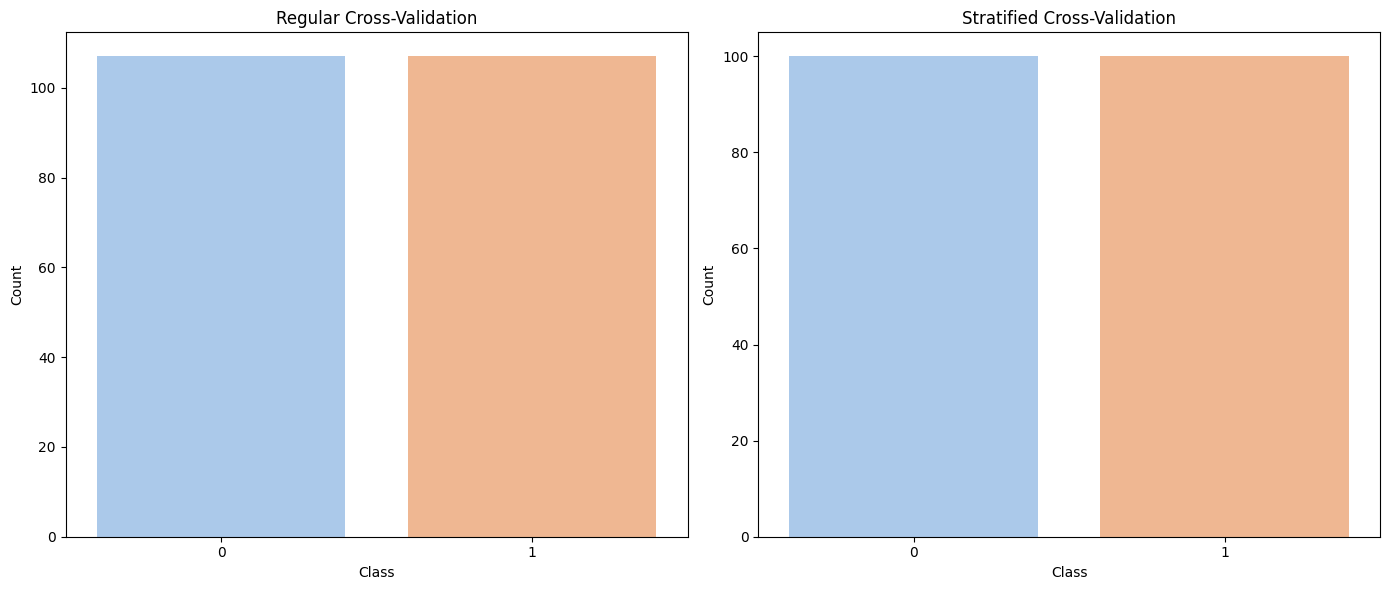

In [23]:
#Visual Comparision

from sklearn.model_selection import KFold, StratifiedKFold
import seaborn as sns
import matplotlib.pyplot as plt

# Example Data Preparation
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Regular Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_idx, test_idx in kf.split(X):
    sns.countplot(x=y[test_idx], ax=axes[0], palette='pastel')
axes[0].set_title('Regular Cross-Validation')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')

# Stratified Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_idx, test_idx in skf.split(X, y):
    sns.countplot(x=y[test_idx], ax=axes[1], palette='pastel')
axes[1].set_title('Stratified Cross-Validation')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# **Conclusion and Overview**

***Project Summary***

In this project, we embarked on a comprehensive analysis of credit card fraud detection using a structured approach. The primary objective was to build and evaluate a robust model to identify fraudulent transactions, leveraging various data science techniques and tools. Our workflow encompassed several key steps: understanding the data, preprocessing, model training and evaluation, and practical deployment considerations

## **Key Findings**

**1. Data Analysis and Preprocessing :**

*   We explored the dataset to identify critical features influencing fraud detection. Our analysis highlighted that features such as transaction amount, time of transaction, and user behavior patterns are significantly associated with fraud.

*   We addressed missing values and outliers, ensuring the data quality was suitable for model training. Visualizations such as heatmaps and distribution plots facilitated our understanding of data imbalances and quality issues.

**2. Model Training and Evaluation:**


*   We implemented Gaussian Naive Bayes and Random Forest classifiers to predict fraudulent transactions. The models were trained and evaluated using various metrics, including the ROC curve, F1 score, and confusion matrix.

*   Hyperparameter tuning through GridSearchCV was employed to optimize model performance. We observed improvements in accuracy and precision by fine-tuning parameters, which underscored the importance of model optimization in achieving high performance.

**3. Visualization and Insights:**


*   Throughout the project, we utilized various visualizations, such as feature importance plots, ROC curves, and confusion matrices, to interpret model results effectively.

*   The lift curve and precision-recall curves provided insights into the model's ability to identify fraud effectively, demonstrating the model's practical utility.

**4. Practical Implementation:**


*   We discussed the infrastructure required for deploying the fraud detection model, including cloud servers, Docker containers, and web frameworks like Flask or Django.

*   Monitoring tools and strategies for model performance were outlined, emphasizing the importance of logging, alerts, and periodic retraining to ensure the model remains effective in a live environment.








## **Recommendations**



**1. Enhanced Feature Engineering:**


*   Incorporating additional features such as user demographics and transaction patterns could further enhance the model's accuracy and reliability.

**2. Advanced Model Techniques:**


*   Exploring advanced models like ensemble methods or neural networks might provide better performance and insights, especially with larger and more complex datasets.

**3. Continuous Monitoring and Retraining:**


*   Establishing a robust monitoring framework and retraining the model with new data regularly will help in adapting to evolving fraud patterns and maintaining model accuracy.







# **Conclusion**

This project demonstrated the critical role of data science in combating credit card fraud by leveraging machine learning techniques and practical implementation strategies. The insights gained from the analysis not only provided a clear understanding of fraud detection but also highlighted areas for future improvements and enhancements. By implementing and deploying the solutions discussed, organizations can effectively mitigate the risk of fraud and enhance their financial security.